(examples:hrtem_quickstart)=
# HRTEM quickstart

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ase.build import bulk
from ase.cluster import Decahedron
from dask.distributed import Client

import abtem

<AxesSubplot:xlabel='x [Å]', ylabel='z [Å]'>

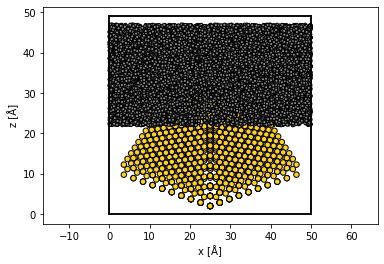

In [2]:
carbon = bulk('C', cubic=True)

carbon *= (14, 14, 7) 

carbon.positions[:] += np.random.randn(len(carbon), 3) * .5 # displace atoms with a standard deviation of .5 Å

carbon.wrap()


cluster = Decahedron('Au', 
                     10, # Number of atoms on the facets perpendicular to the five fold axis.
                     2, # Number of atoms on the facets parallel to the five fold axis.
                     0 # Depth of re-entrence at the pentagon corners.
                    )


cluster.rotate('x', -30)

center_height = -20

translated_cluster = cluster.copy()

translated_cluster.translate(np.diag(carbon.cell) / 2 + (0, 0, center_height))

cluster_on_carbon = carbon + translated_cluster

cluster_on_carbon.center(axis=2, vacuum=2)

abtem.show_atoms(cluster_on_carbon, plane='xz')

In [3]:
frozen_phonons = abtem.FrozenPhonons(cluster_on_carbon, 1, {'C':.0, 'Au':0.})

potential = abtem.Potential(frozen_phonons, 
                            gpts = 512,
                            projection = 'infinite', 
                            slice_thickness = 0.5,
                            )

In [4]:
wave = abtem.PlaneWave(energy=200e3)

In [5]:
exit_wave = wave.multislice(potential)

In [6]:
exit_wave.compute()

[########################################] | 100% Completed |  1.9s


(<Figure size 432x288 with 2 Axes>, <Axes:xlabel='x [Å]', ylabel='y [Å]'>)

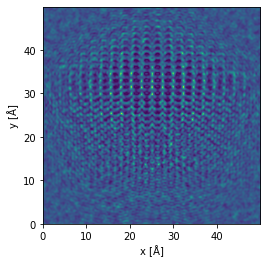

In [31]:
measurement = exit_wave.apply_ctf(defocus=300, semiangle_cutoff=40).intensity()

measurement.show()

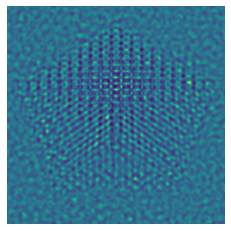

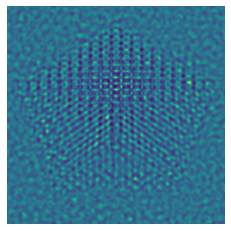

In [15]:
from myst_nb import glue

fig, ax = measurement.show(figsize=(4,4))
ax.axis('off')

glue("hrtem_quickstart", ax.get_figure(), display=False)